# Author: CHINEDU EBERECHUKWU

# SPARKS INTERNSHIP

# TASK 2: Prediction using Unsupervised ML

### KMeans Clustering of Iris Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Iris.csv", index_col="Id")

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
X_train = df.drop(columns = "Species")

In [6]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [7]:
def optimise_k_means(k):
    inertia = []
    clusters = []
    
    for i in range(1, k):
        model = KMeans(n_clusters = i, random_state= 42, n_init = 'auto')
        model.fit(X_train)
        
        inertia.append(model.inertia_)
        clusters.append(i)
        
    plt.plot(clusters, inertia, "o-")
    plt.grid(True)
        

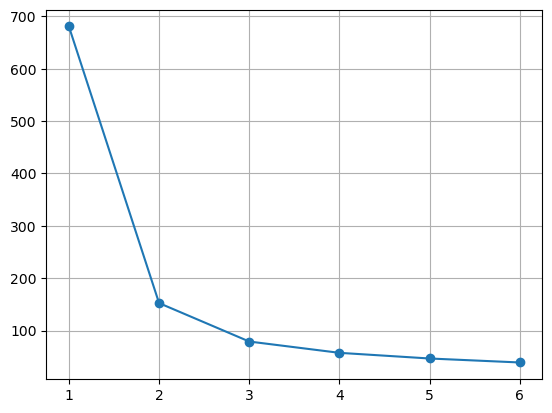

In [8]:
optimise_k_means(7)

In [9]:
km = KMeans(n_clusters = 3, random_state= 42, n_init = 'auto')
km.fit(X_train)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [10]:
df["KMeans_3"] = km.labels_

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,KMeans_3
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [12]:
# Define colour scheme
color_map = {0: 'b', 1 : 'r', 2 : 'g'}

colors = df['KMeans_3'].apply(lambda x: color_map[x])


In [13]:
centroids = km.cluster_centers_

In [14]:
centroids

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

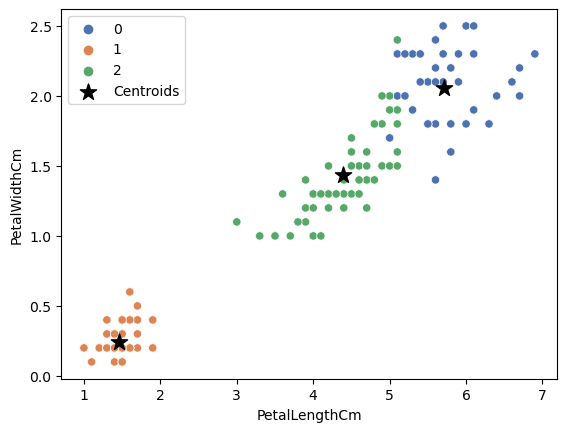

In [15]:
sns.scatterplot(x = df["PetalLengthCm"], 
                y = df["PetalWidthCm"], 
                hue = df["KMeans_3"],
                palette= "deep")

plt.scatter(
    x = centroids[:, 2],
    y = centroids[:, 3],
    marker = "*",
    s = 150,
    c = "black",
    label = "Centroids"
    
)

plt.legend()
plt.show()